In [3]:
# from circuit_suite import circuits
# # from backend_suite import backends, large_backends, shuffle_test, routing_test
# #from backend_suite import placement_test

In [4]:
# from backend_suite import backends
# backends["Hatlab-Large-Riswap-Dense"].pass_manager.run(circuits["QFT"].circuit_lambda(4))

## Circuit Transpile Benchmark

In [2]:
#make a plot :)
import matplotlib.pyplot as plt

def benchmark(backends, circuit_generator, q_range=None, continuously_save=False, overwrite=False):
    #override qrange if provided
    if q_range is None:
        q_range = circuit_generator.q_range
    
    #check if data dicts are empty
    for backend in backends:
        if not circuit_generator.label in backend.data.keys():
            backend.data[circuit_generator.label] = {}
            backend.data[circuit_generator.label]["duration"] = {}
            backend.data[circuit_generator.label]["gate_count"] = {}
            backend.data[circuit_generator.label]["gate_count_crit"] = {}
            backend.data[circuit_generator.label]["layout_score"] = {}

    #outer loop over circuit since this may take long time to generate
    for q in q_range:
        #create new variable sized lambda circuit

        #wait to build circuit (may be costly), if we end up not needing it for any backend
        qc = None
        if overwrite:
            qc = circuit_generator.circuit_lambda(q)

        for backend in backends:
            
            #condition to skip
            if not overwrite:
                #convert to int because if loaded from json key will be a string
                if q in [int(k) for k in backend.data[circuit_generator.label]["gate_count"].keys()]:
                    continue

            #resolve wait
            if qc is None:
                qc = circuit_generator.circuit_lambda(q)

            #logging.info(f"Transpiler qc{q} for {backend.label}")
            print(f"Transpiler qc{q} for {backend.label}")
            backend.pass_manager.run(qc)

            #save data to dict
            #might be empty if not decomposing swaps
            if "duration_longest_path_length" in backend.pass_manager.property_set.keys():
                duration = backend.pass_manager.property_set["duration_longest_path_length"]
                backend.data[circuit_generator.label]["duration"][q] = float(duration)
            
            gate_count = backend.pass_manager.property_set["count_ops"]
            backend.data[circuit_generator.label]["gate_count"][q] = gate_count

            #FIXME
            # gate_count_critical_path = backend.pass_manager.property_set["count_ops_longest_path"]
            # backend.data[circuit_generator.label]["gate_count_crit"][q] = gate_count_critical_path

            layout_score = backend.pass_manager.property_set["layout_score"]
            backend.data[circuit_generator.label]["layout_score"][q] = float(layout_score)

            #for long tests, may want to save more regularly in case exit early
            if continuously_save:
                backend.save_json()
                
    for backend in backends:
        #save dict to json
        backend.save_json()

In [3]:
#FIXME, use figure to handle subplots
def plot(backends, circuit_label, parameter="duration"):
    for backend in backends:
        if circuit_label in backend.data.keys():
            if "swap" not in parameter:
                x = backend.data[circuit_label][parameter].keys()
                x = [int(el) for el in list(x)]
                y = backend.data[circuit_label][parameter].values()
                x, y = zip(*sorted(zip(x, y)))
                plt.plot(x, y, '-o', label=backend.label)
                plt.ylabel("crit path normalized pulse duration")
            else:
                x = backend.data[circuit_label]["gate_count"].keys()
                x = [int(el) for el in list(x)]
                y = backend.data[circuit_label]["gate_count"].values()
                x, y = zip(*zip(x, y))
                y = [el['swap'] if 'swap' in el.keys() else 0 for el in y]
                x,y = zip(*sorted(zip(x,y)))
                plt.plot(x, y, '-o', label=backend.label)
                plt.ylabel("SWAP gate count")

    plt.xlabel(circuit_label)
    plt.legend()

    #savefig
    filename = f"images/large_{circuit_label}_{parameter}"
    import os
    i = 0
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    plt.savefig('{}{:d}.png'.format(filename, i), facecolor='white')

#plot(placement_test, circuit_gen.label, parameter="duration")
#plot(routing_test, circuit_gen.label, parameter="layout_score")

Transpiler qc8 for Hatlab-cx
Transpiler qc16 for Hatlab-cx
Transpiler qc24 for Hatlab-cx
Transpiler qc32 for Hatlab-cx
Transpiler qc48 for Hatlab-cx
Transpiler qc64 for Hatlab-cx
Transpiler qc80 for Hatlab-cx


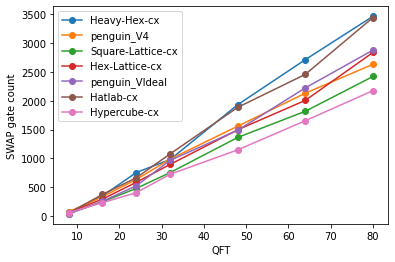

In [11]:
from backend_suite_v2 import topology_backends
from circuit_suite import circuits
circuit_gen = circuits["QFT"]
benchmark(backends=topology_backends, circuit_generator=circuit_gen, continuously_save=True)
#plot(topology_backends, circuit_gen.label, parameter="duration")
plot(topology_backends, circuit_gen.label, parameter="swap_count")

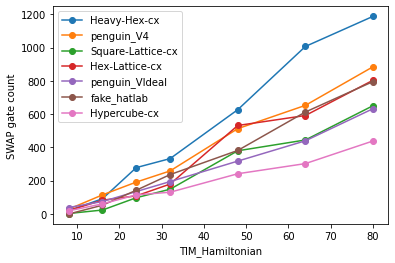

In [8]:
from backend_suite_v2 import topology_backends
from circuit_suite import circuits
circuit_gen = circuits["TIM_Hamiltonian"]
benchmark(backends=topology_backends, circuit_generator=circuit_gen, continuously_save=True)
#plot(topology_backends, circuit_gen.label, parameter="duration")
plot(topology_backends, circuit_gen.label, parameter="swap_count")

Transpiler qc8 for Heavy-Hex-cx
Transpiler qc8 for penguin_V4
Transpiler qc8 for Square-Lattice-cx
Transpiler qc8 for Hex-Lattice-cx
Transpiler qc8 for penguin_VIdeal
Transpiler qc8 for fake_hatlab
Transpiler qc8 for Hypercube-cx
Transpiler qc16 for Heavy-Hex-cx
Transpiler qc16 for penguin_V4
Transpiler qc16 for Square-Lattice-cx
Transpiler qc16 for Hex-Lattice-cx
Transpiler qc16 for penguin_VIdeal
Transpiler qc16 for fake_hatlab
Transpiler qc16 for Hypercube-cx
Transpiler qc24 for Heavy-Hex-cx
Transpiler qc24 for penguin_V4
Transpiler qc24 for Square-Lattice-cx
Transpiler qc24 for Hex-Lattice-cx
Transpiler qc24 for penguin_VIdeal
Transpiler qc24 for fake_hatlab
Transpiler qc24 for Hypercube-cx
Transpiler qc32 for Heavy-Hex-cx
Transpiler qc32 for penguin_V4
Transpiler qc32 for Square-Lattice-cx
Transpiler qc32 for Hex-Lattice-cx
Transpiler qc32 for penguin_VIdeal
Transpiler qc32 for fake_hatlab
Transpiler qc32 for Hypercube-cx
Transpiler qc48 for Heavy-Hex-cx
Transpiler qc48 for pengui

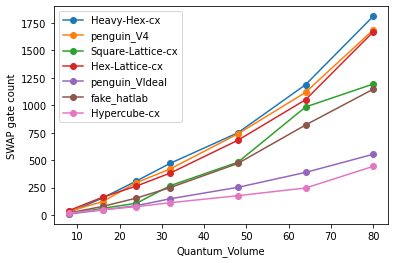

In [9]:
from backend_suite_v2 import topology_backends
from circuit_suite import circuits
circuit_gen = circuits["Quantum_Volume"]
benchmark(backends=topology_backends, circuit_generator=circuit_gen, continuously_save=True)
#plot(topology_backends, circuit_gen.label, parameter="duration")
plot(topology_backends, circuit_gen.label, parameter="swap_count")

/home/evm9/transpilation_EM/venv/lib/python3.8/site-packages/qiskit/transpiler/passes/optimization/consolidate_blocks.py:55: UserWarning: Only know how to decompose properly for supercontrolled basis gate. This gate is ~Ud(0.3926990816987239, 0.3926990816987239, 0.0)
  self.decomposer = TwoQubitBasisDecomposer(kak_basis_gate)


Transpiler qc8 for Heavy-Hex-cx
Transpiler qc8 for penguin_V4
Transpiler qc8 for Square-Lattice-cx
Transpiler qc8 for Hex-Lattice-cx
Transpiler qc8 for penguin_VIdeal
Transpiler qc8 for fake_hatlab
Transpiler qc8 for Hypercube-cx
Transpiler qc16 for Heavy-Hex-cx
Transpiler qc16 for penguin_V4
Transpiler qc16 for Square-Lattice-cx
Transpiler qc16 for Hex-Lattice-cx
Transpiler qc16 for penguin_VIdeal
Transpiler qc16 for fake_hatlab
Transpiler qc16 for Hypercube-cx
Transpiler qc24 for Heavy-Hex-cx
Transpiler qc24 for penguin_V4
Transpiler qc24 for Square-Lattice-cx
Transpiler qc24 for Hex-Lattice-cx
Transpiler qc24 for penguin_VIdeal
Transpiler qc24 for fake_hatlab
Transpiler qc24 for Hypercube-cx
Transpiler qc32 for Heavy-Hex-cx
Transpiler qc32 for penguin_V4
Transpiler qc32 for Square-Lattice-cx
Transpiler qc32 for Hex-Lattice-cx
Transpiler qc32 for penguin_VIdeal
Transpiler qc32 for fake_hatlab
Transpiler qc32 for Hypercube-cx
Transpiler qc48 for Heavy-Hex-cx
Transpiler qc48 for pengui

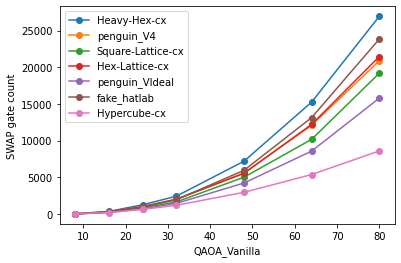

In [10]:
from backend_suite_v2 import topology_backends
from circuit_suite import circuits
circuit_gen = circuits["QAOA_Vanilla"]
benchmark(backends=topology_backends, circuit_generator=circuit_gen, continuously_save=True)
#plot(topology_backends, circuit_gen.label, parameter="duration")
plot(topology_backends, circuit_gen.label, parameter="swap_count")

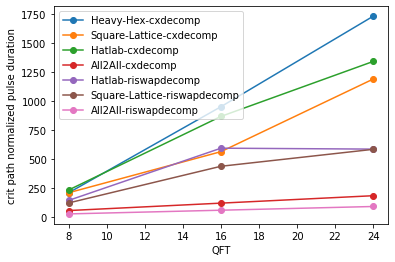

In [4]:
from backend_suite_v2 import decomp_backends
from circuit_suite import circuits
circuit_gen = circuits["QFT"]
benchmark(backends=decomp_backends, circuit_generator=circuit_gen, continuously_save=True)
plot(decomp_backends, circuit_gen.label, parameter="duration")

Transpiler qc8 for Heavy-Hex-cxdecomp
Transpiler qc8 for Square-Lattice-cxdecomp
Transpiler qc8 for Hatlab-cxdecomp
Transpiler qc8 for All2All-cxdecomp
Transpiler qc8 for Hatlab-riswapdecomp
Transpiler qc8 for Square-Lattice-riswapdecomp
Transpiler qc8 for All2All-riswapdecomp
Transpiler qc16 for Heavy-Hex-cxdecomp
Transpiler qc16 for Square-Lattice-cxdecomp
Transpiler qc16 for Hatlab-cxdecomp
Transpiler qc16 for All2All-cxdecomp
Transpiler qc16 for Hatlab-riswapdecomp
Transpiler qc16 for Square-Lattice-riswapdecomp
Transpiler qc16 for All2All-riswapdecomp
Transpiler qc24 for Heavy-Hex-cxdecomp
Transpiler qc24 for Square-Lattice-cxdecomp
Transpiler qc24 for Hatlab-cxdecomp
Transpiler qc24 for All2All-cxdecomp
Transpiler qc24 for Hatlab-riswapdecomp
Transpiler qc24 for Square-Lattice-riswapdecomp
Transpiler qc24 for All2All-riswapdecomp


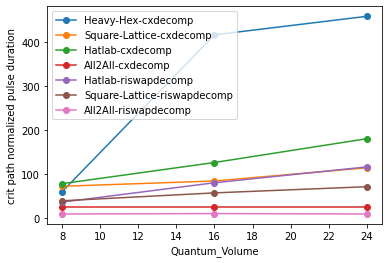

In [5]:
from backend_suite_v2 import decomp_backends
from circuit_suite import circuits
circuit_gen = circuits["Quantum_Volume"]
benchmark(backends=decomp_backends, circuit_generator=circuit_gen, continuously_save=True)
plot(decomp_backends, circuit_gen.label, parameter="duration")

In [6]:
from backend_suite_v2 import decomp_backends
from circuit_suite import circuits
circuit_gen = circuits["TIM_Hamiltonian"]
benchmark(backends=decomp_backends, circuit_generator=circuit_gen, continuously_save=True)
plot(decomp_backends, circuit_gen.label, parameter="duration")

Transpiler qc8 for Heavy-Hex-cxdecomp
Transpiler qc8 for Square-Lattice-cxdecomp
Transpiler qc8 for Hatlab-cxdecomp
Transpiler qc8 for All2All-cxdecomp
Transpiler qc8 for Hatlab-riswapdecomp
Transpiler qc8 for Square-Lattice-riswapdecomp
Transpiler qc8 for All2All-riswapdecomp
Transpiler qc16 for Heavy-Hex-cxdecomp
Transpiler qc16 for Square-Lattice-cxdecomp
Transpiler qc16 for Hatlab-cxdecomp
Transpiler qc16 for All2All-cxdecomp
Transpiler qc16 for Hatlab-riswapdecomp


In [ ]:
from backend_suite_v2 import decomp_backends
from circuit_suite import circuits
circuit_gen = circuits["QAOA_Vanilla"]
benchmark(backends=decomp_backends, circuit_generator=circuit_gen, continuously_save=True)
plot(decomp_backends, circuit_gen.label, parameter="duration")